# AI Impact on the Job Market - Notebook 2 (Visualizations, Transformations, Experiments)
### A visualization report by Ali Powell

I will primarily be focused on exploring the AI dataset, as it is the main dataset I chose for this project, but included the code to generate graphs from the alternate datasets that I used for disputing purposes at the very end of this notebook.

In [35]:
# Setup - from Notebook 1

! pip install kagglehub

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(context='notebook', style='white')

sns.set_palette("Set2")
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=sns.color_palette())

data_path = "/Users/alipowell/.cache/kagglehub/datasets/sahilislam007/ai-impact-on-job-market-20242030/versions/1"

AI_data = pd.read_csv(f"{data_path}/ai_job_trends_dataset.csv")
AI_data.head()

numerical_features = [
    'Median Salary (USD)', 'Experience Required (Years)',
    'Job Openings (2024)', 'Projected Openings (2030)',
    'Remote Work Ratio (%)', 'Automation Risk (%)',
    'Gender Diversity (%)'
]

categorical_features = [
    'Industry', 'Job Status', 'AI Impact Level',
    'Required Education', 'Location'
]


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## Preliminary Visualizations - Single and Double Features

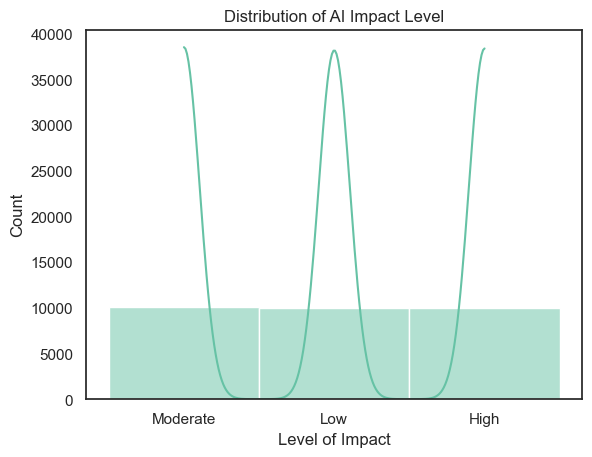

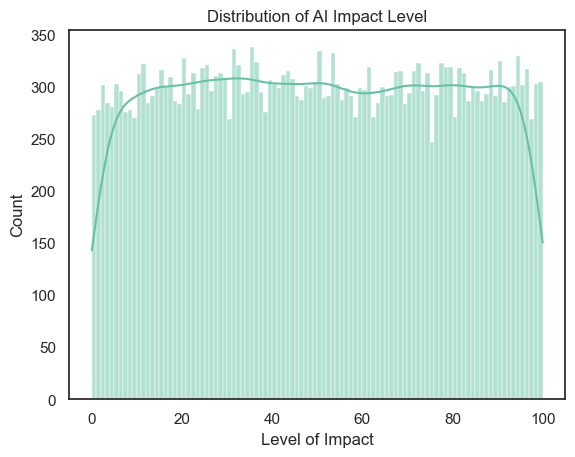

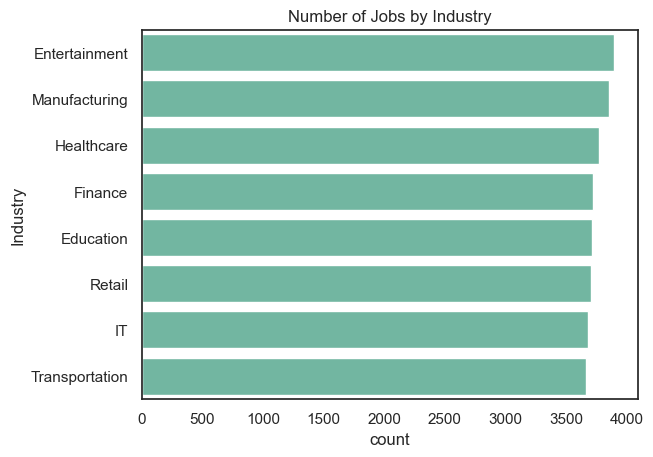

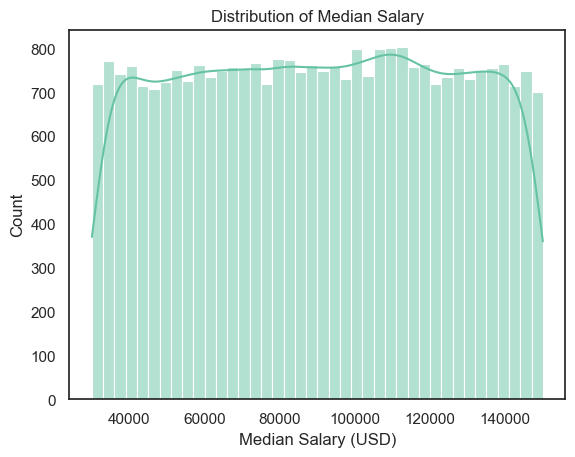

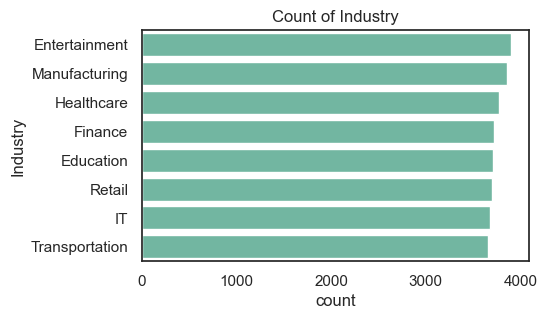

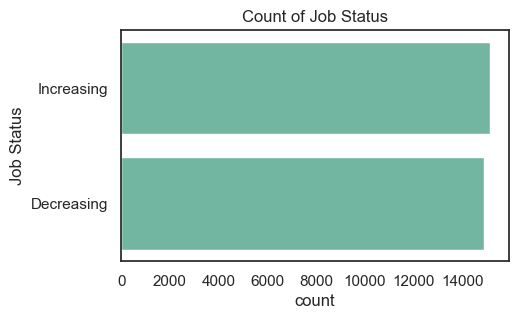

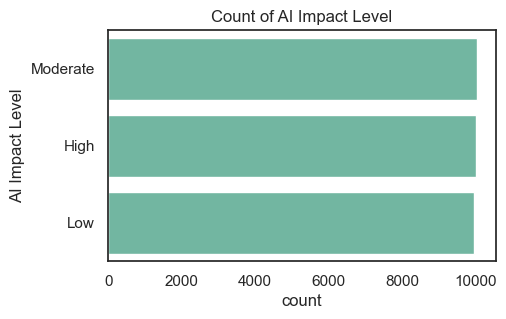

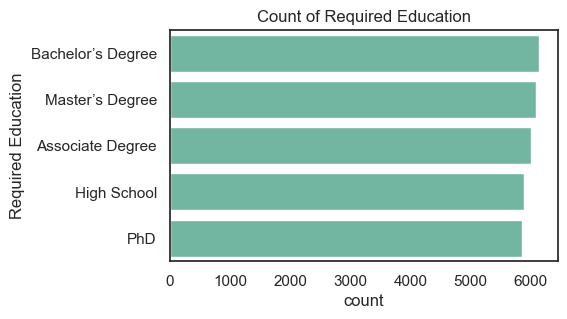

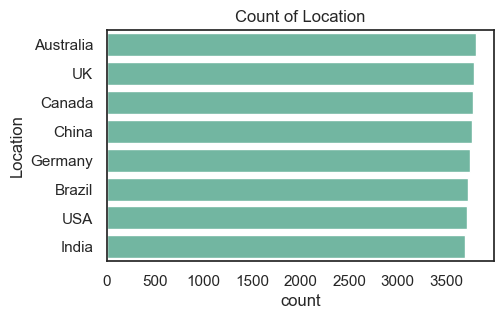

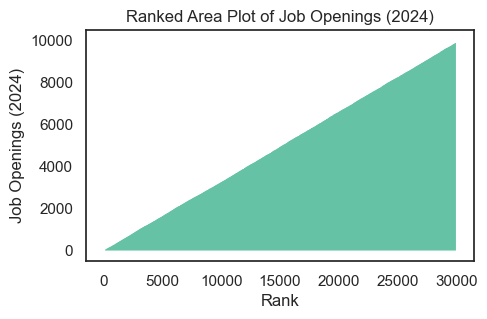

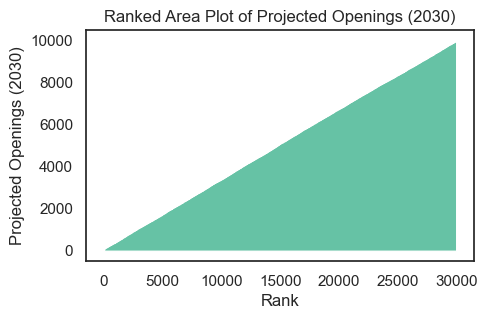

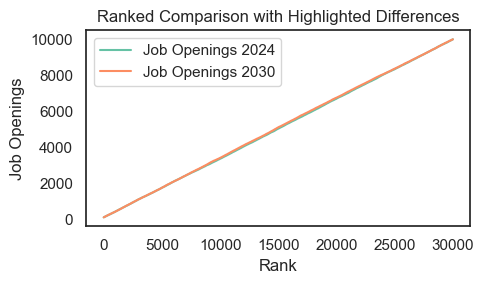

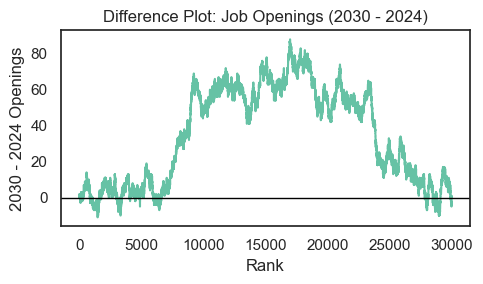

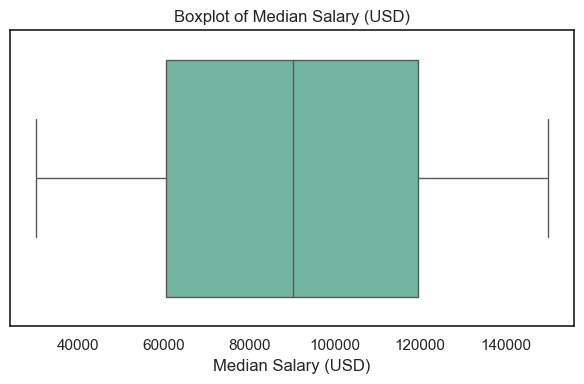

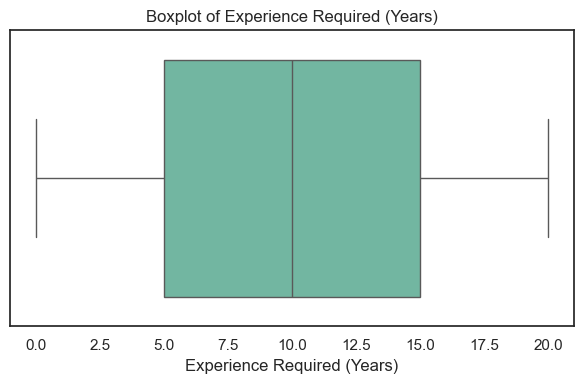

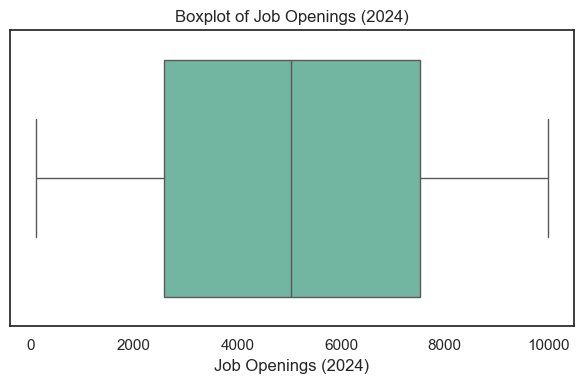

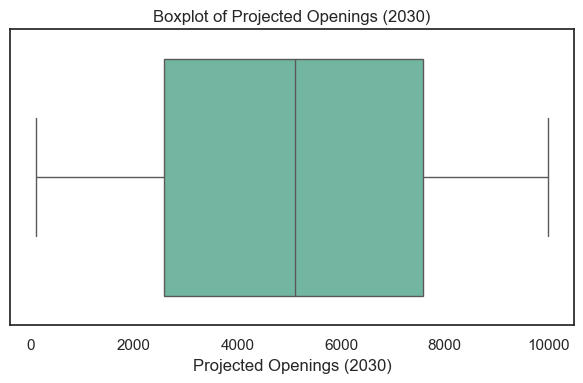

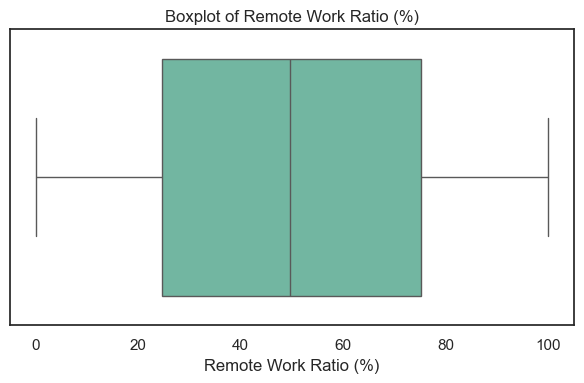

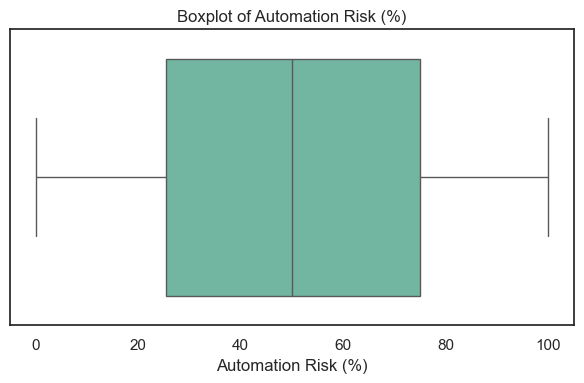

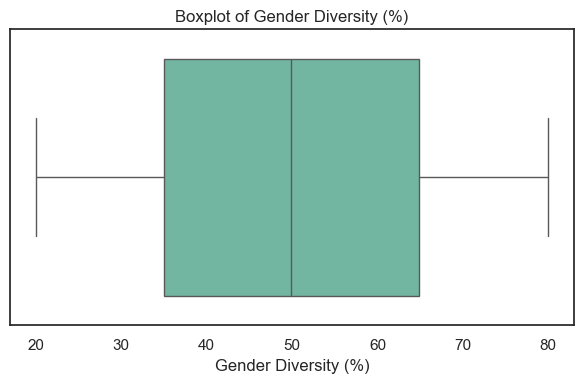

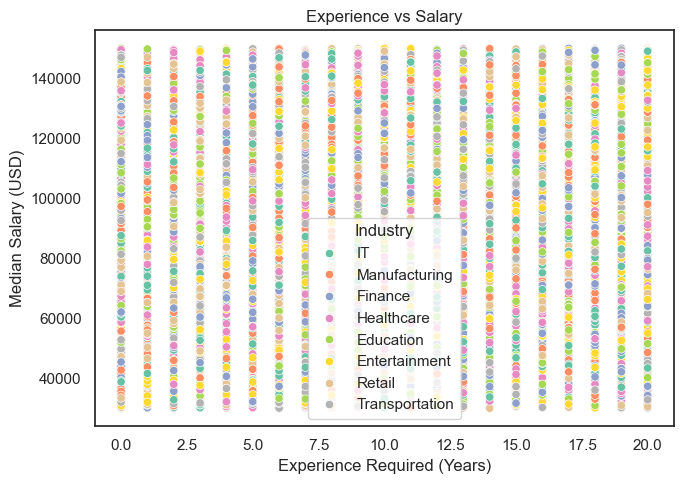

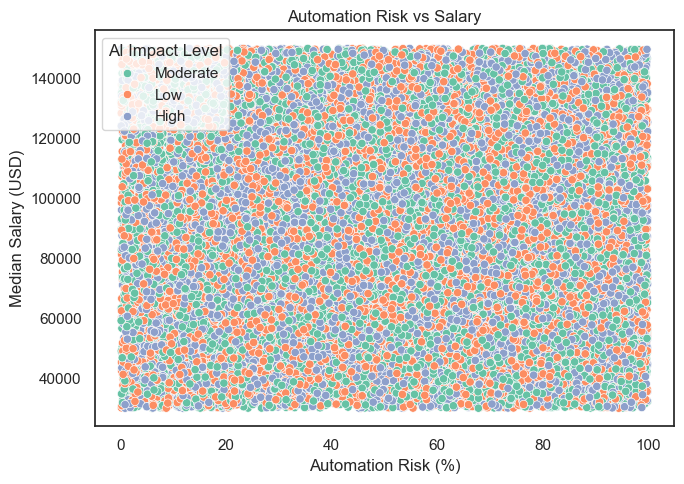

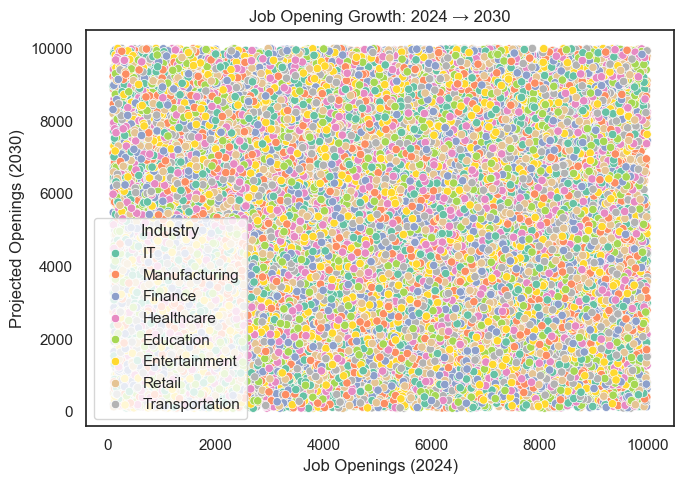

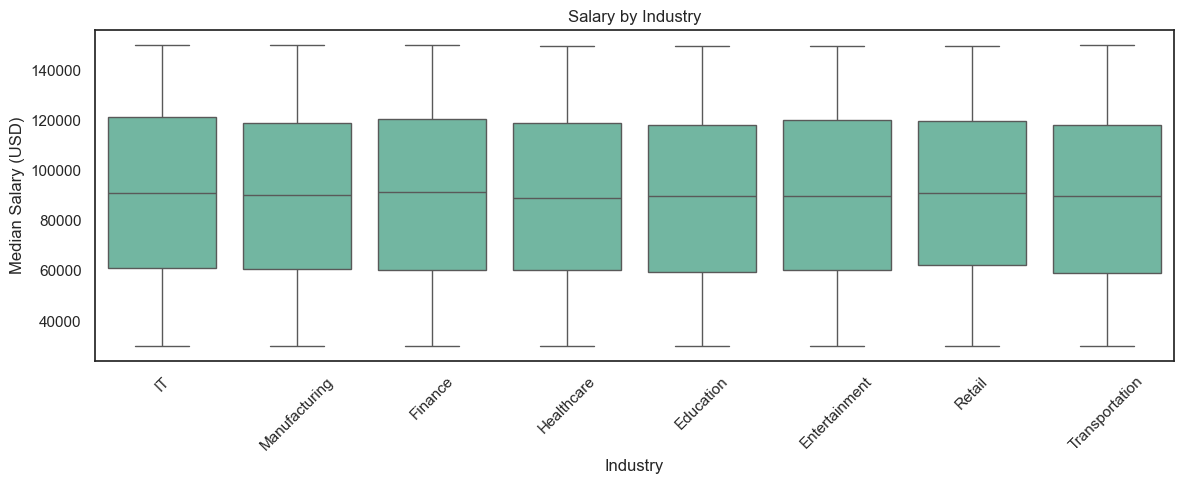

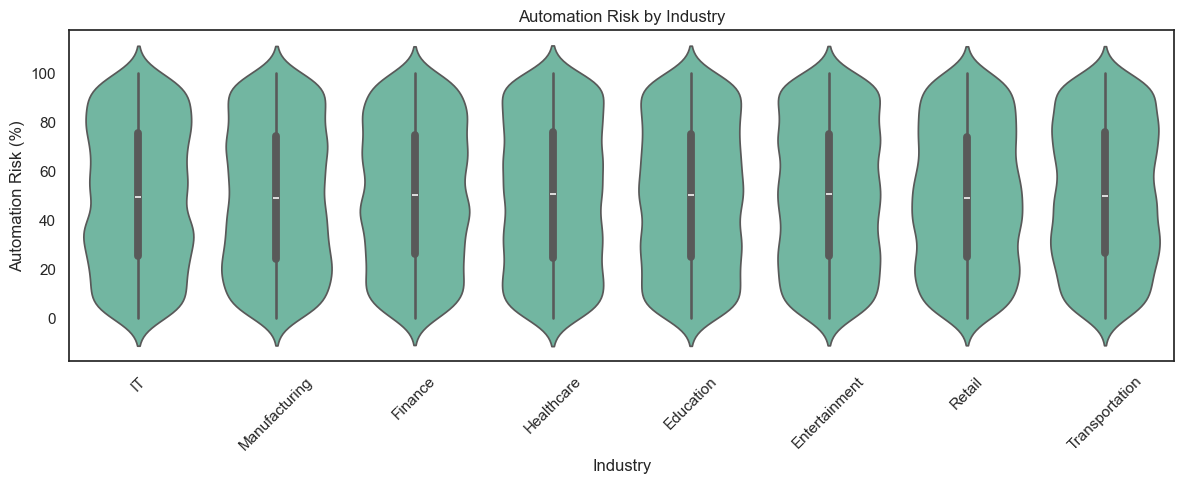

In [40]:
# Single Variable Visualizations

# Histogram of AI Impact Level - SINGLE
sns.histplot(AI_data['AI Impact Level'], kde=True, bins=100)

plt.title('Distribution of AI Impact Level')
plt.xlabel('Level of Impact')
plt.show()

# Automation Risk % - SINGLE

sns.histplot(AI_data['Automation Risk (%)'], kde=True, bins=100)

plt.title('Distribution of AI Impact Level')
plt.xlabel('Level of Impact')
plt.show()

# Number of Jobs by Industry Chart - SINGLE

sns.countplot(y='Industry', 
              data=AI_data, 
              order=AI_data['Industry'].value_counts().index)
plt.title('Number of Jobs by Industry')
plt.show()

# Histogram of salary distribution - SINGLE

sns.histplot(AI_data['Median Salary (USD)'], 
             kde=True, 
             bins=40)
plt.title('Distribution of Median Salary')
plt.xlabel('Median Salary (USD)')
plt.show()

# Count plots by categorical feature - SINGLE PLOTS

for feature in categorical_features:
    plt.figure(figsize=(5,3))
    sns.countplot(y=AI_data[feature], order=AI_data[feature].value_counts().index)
    plt.title(f'Count of {feature}')
    plt.show()

# Job Openings and Projected Openings Ranked Chart - DUO

sorted_2024 = AI_data["Job Openings (2024)"].sort_values().reset_index(drop=True)

plt.figure(figsize=(5,3))
plt.fill_between(range(len(sorted_2024)), sorted_2024)
plt.xlabel("Rank")
plt.ylabel("Job Openings (2024)")
plt.title("Ranked Area Plot of Job Openings (2024)")
plt.show()

# Projected Openings Ranked Chart - SINGLE

sorted_2030 = AI_data["Projected Openings (2030)"].sort_values().reset_index(drop=True)

plt.figure(figsize=(5,3))
plt.fill_between(range(len(sorted_2030)), sorted_2030)
plt.xlabel("Rank")
plt.ylabel("Projected Openings (2030)")
plt.title("Ranked Area Plot of Projected Openings (2030)")
plt.show()

#Comparison between Projected and Current Job Openings - SINGLES

plt.figure(figsize=(5,3))

plt.plot(sorted_2024, label="Job Openings 2024")
plt.plot(sorted_2030, label="Job Openings 2030")

plt.fill_between(
    range(len(sorted_2024)),
    sorted_2024,
    sorted_2030,
    where=sorted_2030 > sorted_2024,
    alpha=0.9
)

plt.xlabel("Rank")
plt.ylabel("Job Openings")
plt.title("Ranked Comparison with Highlighted Differences")
plt.legend()
plt.tight_layout()
plt.show()

# Difference Plot to better show comparison - DUO

difference = sorted_2030 - sorted_2024

plt.figure(figsize=(5,3))
plt.plot(difference)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel("Rank")
plt.ylabel("2030 - 2024 Openings")
plt.title("Difference Plot: Job Openings (2030 - 2024)")
plt.tight_layout()
plt.show()

# Boxplots for outlier detection
for col in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=AI_data[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Salary v Experience

plt.figure(figsize=(7,5))
sns.scatterplot(data=AI_data, x='Experience Required (Years)', 
                y='Median Salary (USD)', hue='Industry')
plt.title("Experience vs Salary")
plt.tight_layout()
plt.show()

# Automation Risk v Salary

plt.figure(figsize=(7,5))
sns.scatterplot(data=AI_data, x='Automation Risk (%)', 
                y='Median Salary (USD)', hue='AI Impact Level')
plt.title("Automation Risk vs Salary")
plt.tight_layout()
plt.show()

# Job openings 2024 vs 2030

plt.figure(figsize=(7,5))
sns.scatterplot(data=AI_data, 
                x='Job Openings (2024)', 
                y='Projected Openings (2030)', 
                hue='Industry')
plt.title("Job Opening Growth: 2024 → 2030")
plt.tight_layout()
plt.show()

# Salary by Industry

plt.figure(figsize=(12, 5))
sns.boxplot(data=AI_data, x="Industry", y="Median Salary (USD)")
plt.xticks(rotation=45)
plt.title("Salary by Industry")
plt.tight_layout()
plt.show()

# Automation Risk by Industry

plt.figure(figsize=(12, 5))
sns.violinplot(data=AI_data, x="Industry", y="Automation Risk (%)")
plt.xticks(rotation=45)
plt.title("Automation Risk by Industry")
plt.tight_layout()
plt.show()





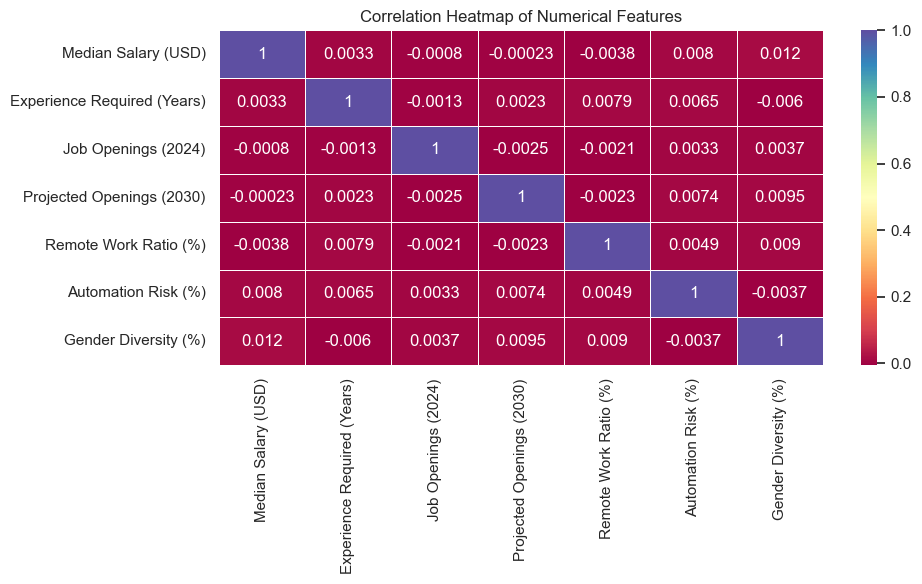

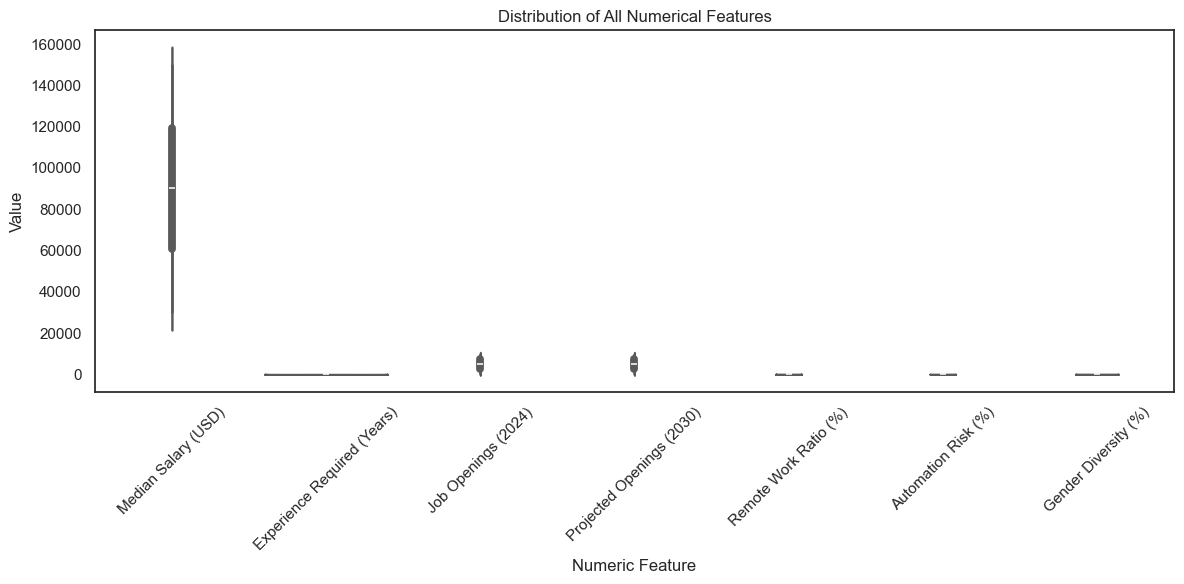

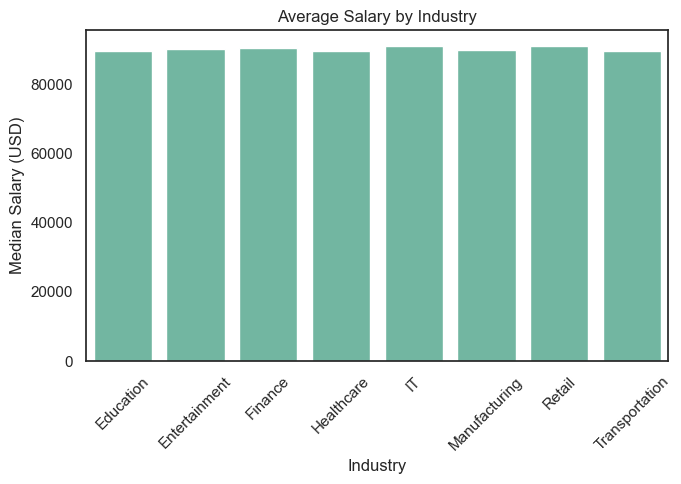

In [64]:
# DATA TRANSFORMATIONS FOR PLOTS

# Wide numeric table for heatmap

numeric_df = AI_data[numerical_features]
corr_matrix = numeric_df.corr()

# Correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="Spectral", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

# Melted table (to help visualize multiple features)

long_df = AI_data.melt(
    id_vars=categorical_features,
    value_vars=numerical_features,
    var_name="Numeric Feature",
    value_name="Value"
)

# Distribution of all numeric features together

plt.figure(figsize=(12, 6))
sns.violinplot(data=long_df, x="Numeric Feature", y="Value")
plt.xticks(rotation=45)
plt.title("Distribution of All Numerical Features")
plt.tight_layout()
plt.show()


# Grouped summary table

industry_salary = AI_data.groupby("Industry")["Median Salary (USD)"].mean().reset_index()

# Barplot

plt.figure(figsize=(7,5))
sns.barplot(data=industry_salary, x="Industry", y="Median Salary (USD)")
plt.xticks(rotation=45)
plt.title("Average Salary by Industry")
plt.tight_layout()
plt.show()




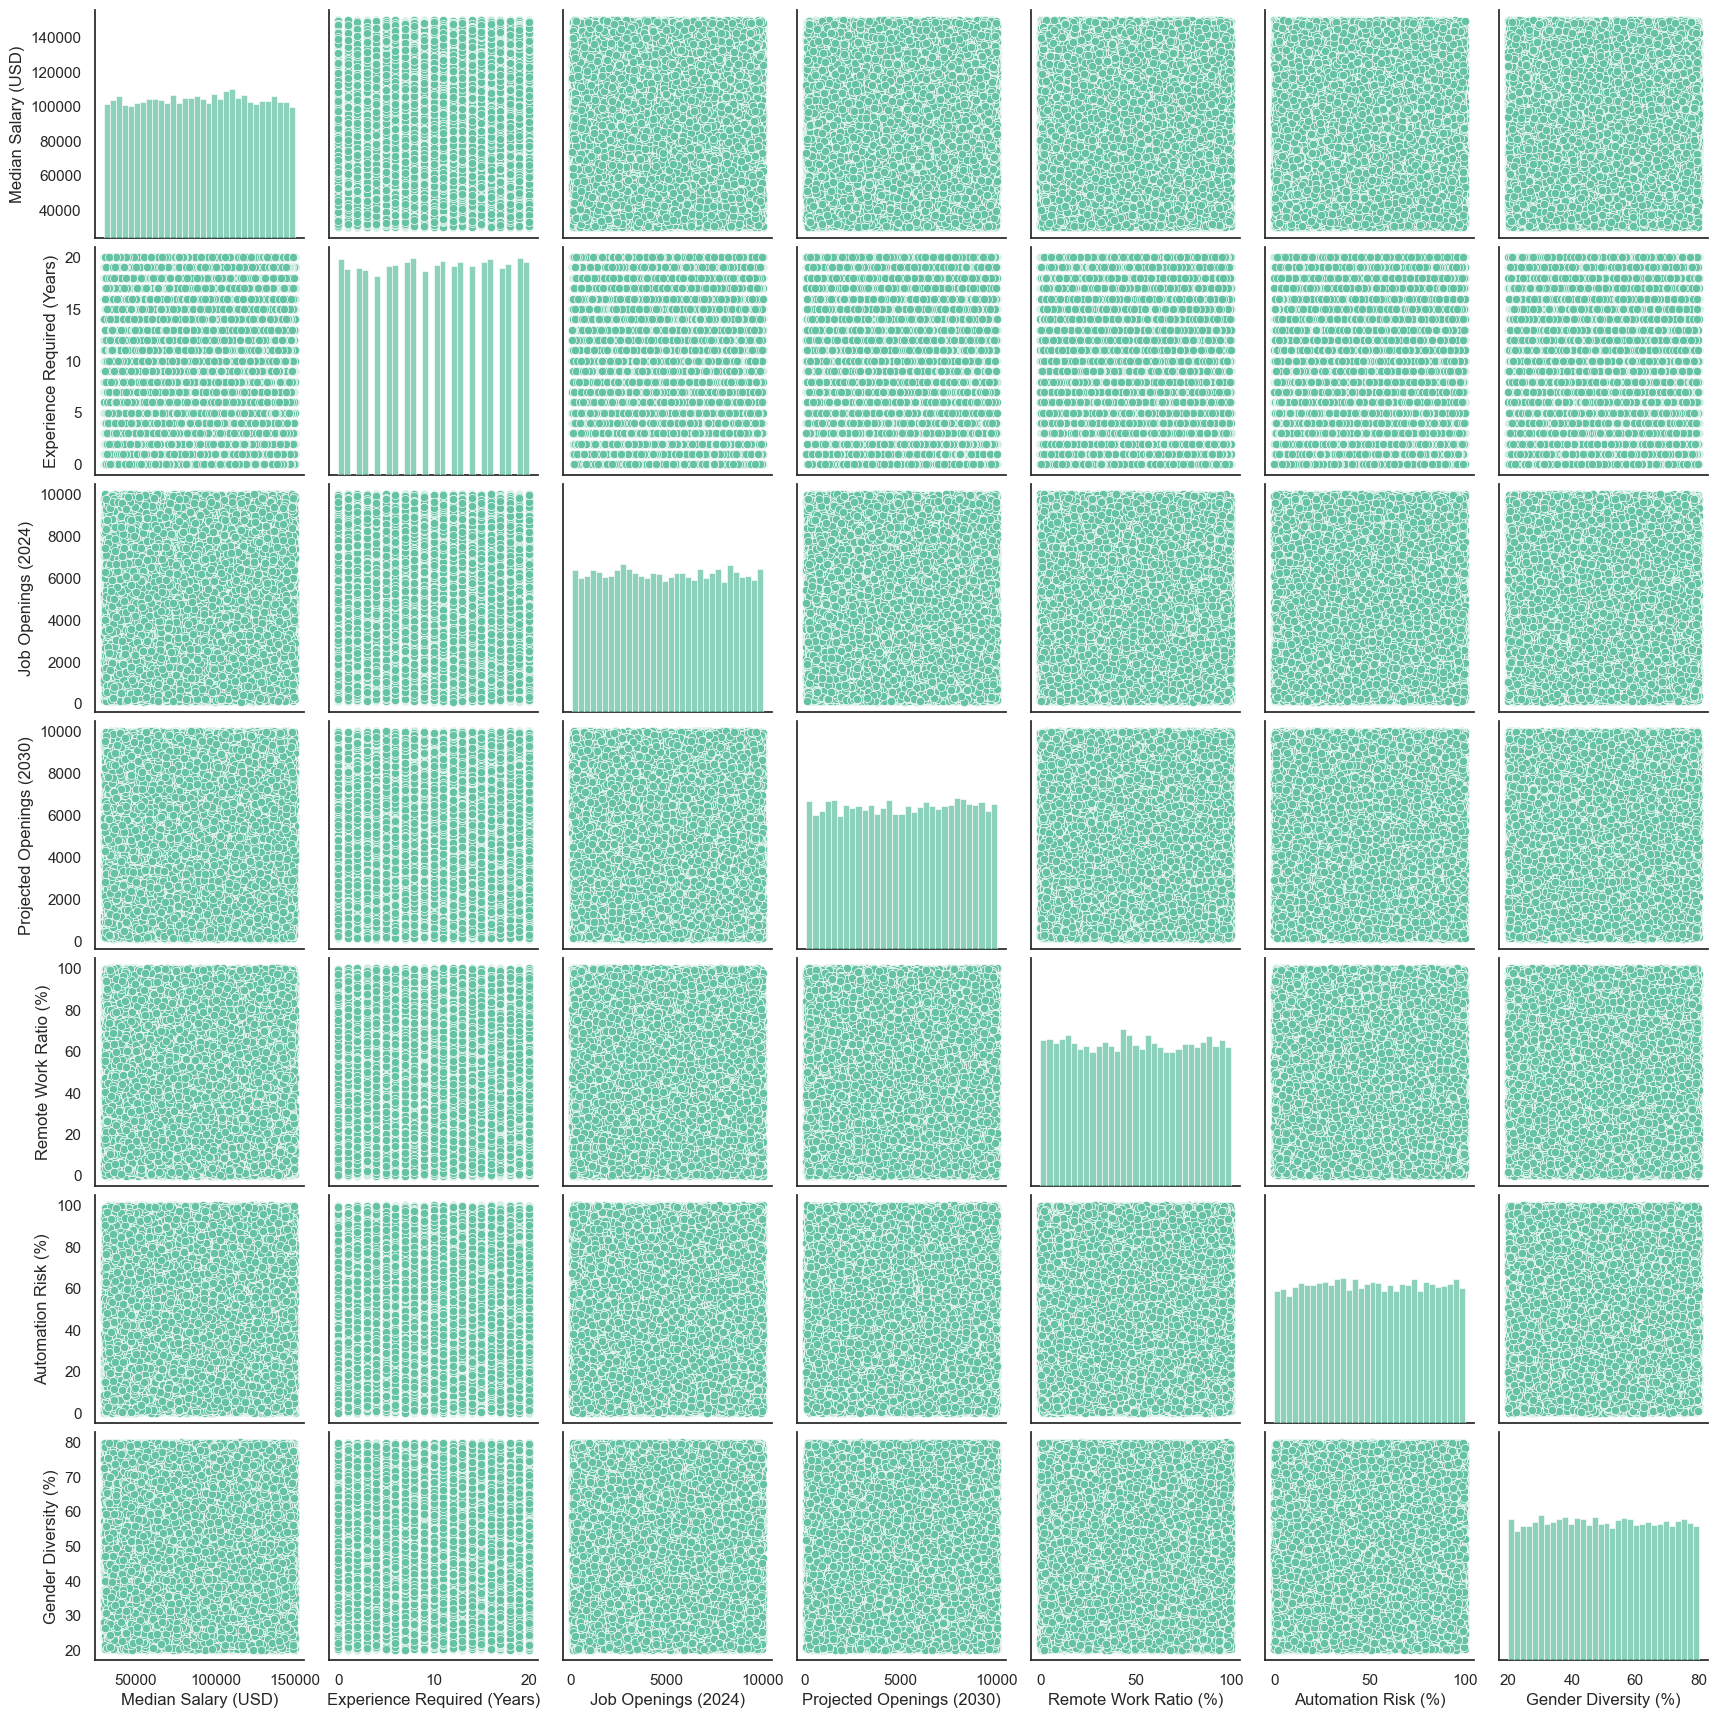

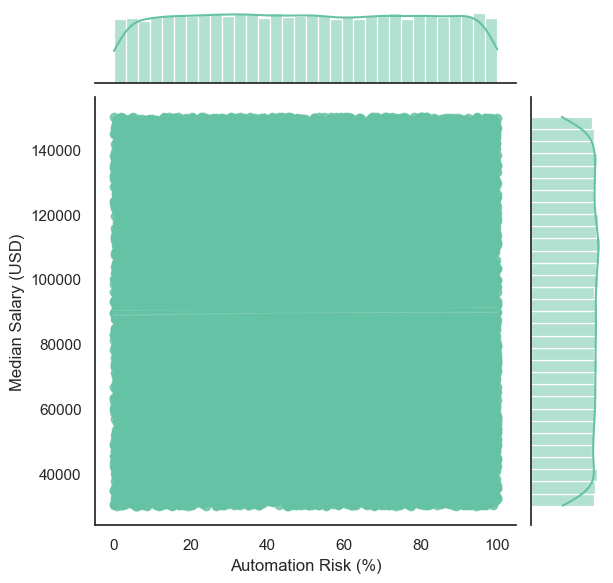

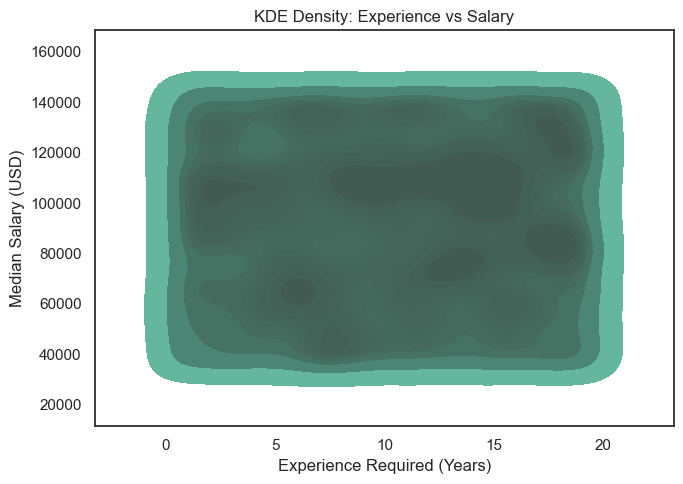

In [49]:
# Trying out different kinds of plots

# pair plot - multivariate overview

sns.pairplot(AI_data[numerical_features])
plt.show()

# Salary vs automation risk regression fit

sns.jointplot(
    data=AI_data, 
    x='Automation Risk (%)', 
    y='Median Salary (USD)', 
    kind='reg'
)
plt.show()

# KDE contour plot

plt.figure(figsize=(7,5))
sns.kdeplot(
    data=AI_data,
    x='Experience Required (Years)',
    y='Median Salary (USD)',
    fill=True,
    thresh=0.05
)
plt.title("KDE Density: Experience vs Salary")
plt.tight_layout()
plt.show()





From all these different sorts of graphs above, it is pretty hard to make out any sort of trend within the data set. As a matter of fact, we can see that the data set is very evenly distributed overall, sharing same amounts of jobs in industries, with similar salaries, similar rates of AI impact, etc. From this information that we found, I am now going to pick a few variables to explore more in depth. I will further explore the results of the difference plot in terms of change from 2024-2030, the results of the AI impact level (low, moderate, high) per industry, and the relationship between country, industry, and ai impact level. 

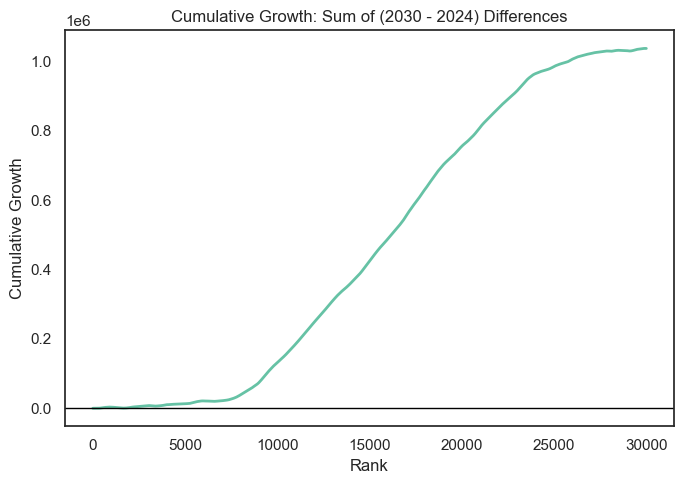

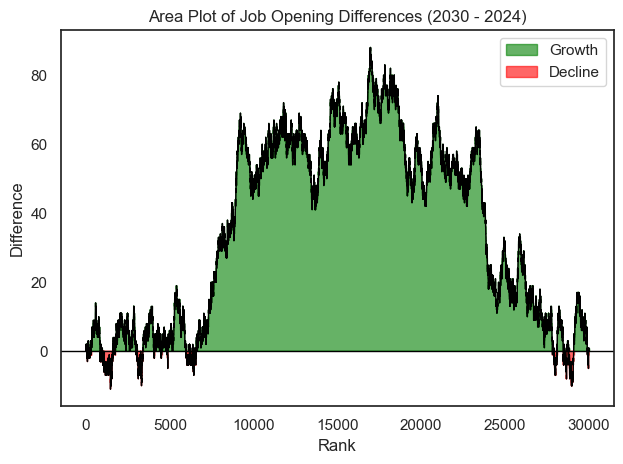

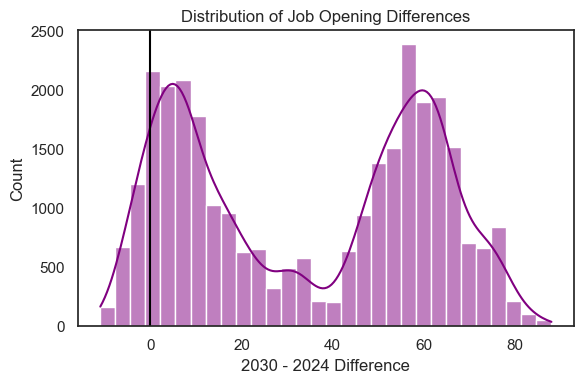

In [ ]:
# Cumulative graph of differences

# This graph takes the same differences (2030 – 2024) and computes a running cumulative sum across ranks. The overall change is positive across all jobs.
# Here, we see that job growth is distributed across ranked options. 
#Flat at the beginning:
#The first chunk of jobs (after ranking) show almost no growth.
#These are occupations with little or no projected increase from 2024 → 2030.
#The cumulative curve begins rising only when it reaches occupations that do show significant projected growth.
#This tells us that most of the growth in job openings comes from a subset of occupations, not all of them equally.
#Flattening at the top:
#Once all the high-growth jobs have been added, the curve levels off.
# This means the remaining occupations again contribute very little additional growth.

# The growth in job openings is concentrated in the middle-ranked occupations, not the very top or bottom.
# This is a non-uniform growth distribution — only certain job categories are driving the projected increase

cumulative = difference.cumsum()

plt.figure(figsize=(7,5))
plt.plot(cumulative, linewidth=2)

plt.axhline(0, color='black', linewidth=1)
plt.title("Cumulative Growth: Sum of (2030 - 2024) Differences")
plt.xlabel("Rank")
plt.ylabel("Cumulative Growth")
plt.tight_layout()
plt.show()

# negative/positive highlighted area plot

# This is a visually enhanced version of my difference line plot. Green areas are where 2030 projections are higher than 2024, and red shows areas where 2030 projections are lower
# Large continuous green areas means many jobs projected to grow
# Red dips means clusters of declining jobs
# The shape of the green vs red regions reveals how growth is distributed across rankings

#The job market is experiencing broad but uneven growth.
# Almost all jobs grow, but a specific subset dominates total expansion.

plt.fill_between(
    range(len(difference)),
    difference,
    where=difference > 0,
    color="green",
    alpha=0.6,
    label="Growth"
)

plt.fill_between(
    range(len(difference)),
    difference,
    where=difference < 0,
    color="red",
    alpha=0.6,
    label="Decline"
)

plt.plot(difference, color="black", linewidth=1)
plt.axhline(0, color='black', linewidth=1)

plt.title("Area Plot of Job Opening Differences (2030 - 2024)")
plt.xlabel("Rank")
plt.ylabel("Difference")
plt.legend()
plt.tight_layout()
plt.show()

# distribution plot of differences

# This suggests that AI and automation affect different job categories differently
# Indicates fewer occupations with medium level growth.
# Jobs tend to either grow a little or grow a lot, not somewhere in the middle.

plt.figure(figsize=(6,4))
sns.histplot(difference, kde=True, color="purple")
plt.axvline(0, color='black')
plt.title("Distribution of Job Opening Differences")
plt.xlabel("2030 - 2024 Difference")
plt.tight_layout()
plt.show()




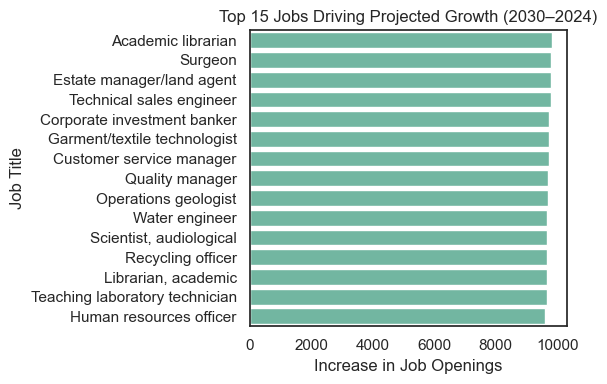

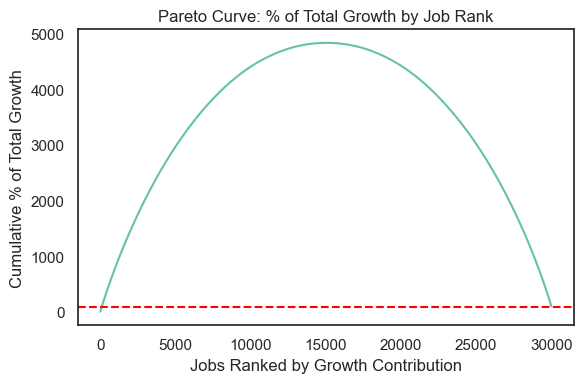

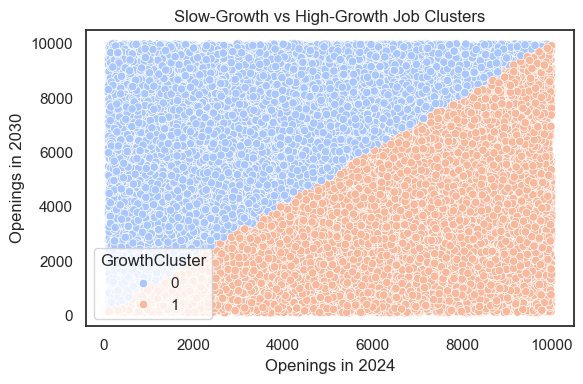

In [62]:
# from those, we have more information to get to the graphs below...

# identifying which jobs are driving projected growth

AI_data["Growth"] = AI_data["Projected Openings (2030)"] - AI_data["Job Openings (2024)"]

top_growth = AI_data.sort_values("Growth", ascending=False).head(15)

plt.figure(figsize=(6,4))
sns.barplot(data=top_growth, y="Job Title", x="Growth")
plt.title("Top 15 Jobs Driving Projected Growth (2030–2024)")
plt.xlabel("Increase in Job Openings")
plt.ylabel("Job Title")
plt.tight_layout()
plt.show()

# identifying the subset that dominates total expansion (shows the subset that contributed to 80% of projected growth overall)

growth_sorted = AI_data.sort_values("Growth", ascending=False)

# Compute cumulative contribution
growth_sorted["Cumulative %"] = growth_sorted["Growth"].cumsum() / growth_sorted["Growth"].sum() * 100

plt.figure(figsize=(6,4))
plt.plot(growth_sorted["Cumulative %"].values)
plt.axhline(80, color='red', linestyle='--')
plt.title("Pareto Curve: % of Total Growth by Job Rank")
plt.xlabel("Jobs Ranked by Growth Contribution")
plt.ylabel("Cumulative % of Total Growth")
plt.tight_layout()
plt.show()

#identify slow growth vs high growth roles

from sklearn.cluster import KMeans

X = AI_data[["Growth"]].values

# Split into 2 clusters (slow-growth vs fast-growth)
kmeans = KMeans(n_clusters=2, random_state=42)
AI_data["GrowthCluster"] = kmeans.fit_predict(X)

plt.figure(figsize=(6,4))
sns.scatterplot(data=AI_data, x="Job Openings (2024)", y="Projected Openings (2030)",
                hue="GrowthCluster", palette="coolwarm")
plt.title("Slow-Growth vs High-Growth Job Clusters")
plt.xlabel("Openings in 2024")
plt.ylabel("Openings in 2030")
plt.tight_layout()
plt.show()

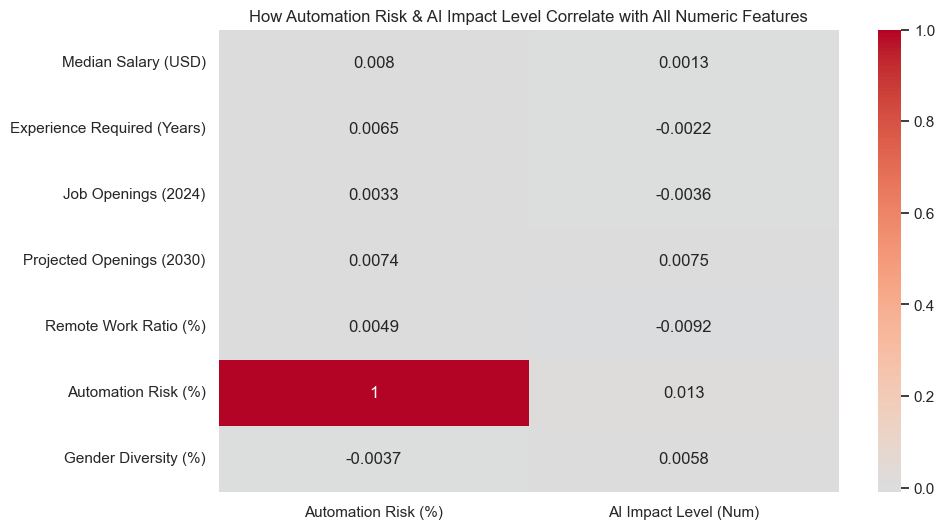

ValueError: num must be an integer with 1 <= num <= 9, not 0

<Figure size 1500x1200 with 0 Axes>

In [67]:
# comparing AI impact level and automation risk to every other variable

impact_map = {"Low": 1, "Medium": 2, "High": 3}
AI_data["AI Impact Level (Num)"] = AI_data["AI Impact Level"].map(impact_map)

numerical_features = [
    'Median Salary (USD)', 'Experience Required (Years)',
    'Job Openings (2024)', 'Projected Openings (2030)',
    'Remote Work Ratio (%)', 'Automation Risk (%)',
    'Gender Diversity (%)'
]

categorical_features = [
    'Industry', 'Job Status', 'AI Impact Level',
    'Required Education', 'Location'
]


correlation_targets = {
    "Automation Risk (%)": AI_data[numerical_features].corrwith(AI_data['Automation Risk (%)']),
    "AI Impact Level (Num)": AI_data[numerical_features].corrwith(AI_data['AI Impact Level (Num)'])
}

corr_df = pd.DataFrame(correlation_targets)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", center=0)
plt.title("How Automation Risk & AI Impact Level Correlate with All Numeric Features")
plt.show()

plt.figure(figsize=(15, 12))

for i, feature in enumerate(numerical_features):
    if feature == 'Automation Risk (%)':  
        continue  # skip, because AI Impact Level vs itself isn't meaningful

    plt.subplot(3, 3, i)
    sns.boxplot(x="AI Impact Level", y=feature, data=AI_data)
    plt.title(f"{feature} by AI Impact Level")

plt.tight_layout()
plt.show()


<Figure size 1400x800 with 0 Axes>

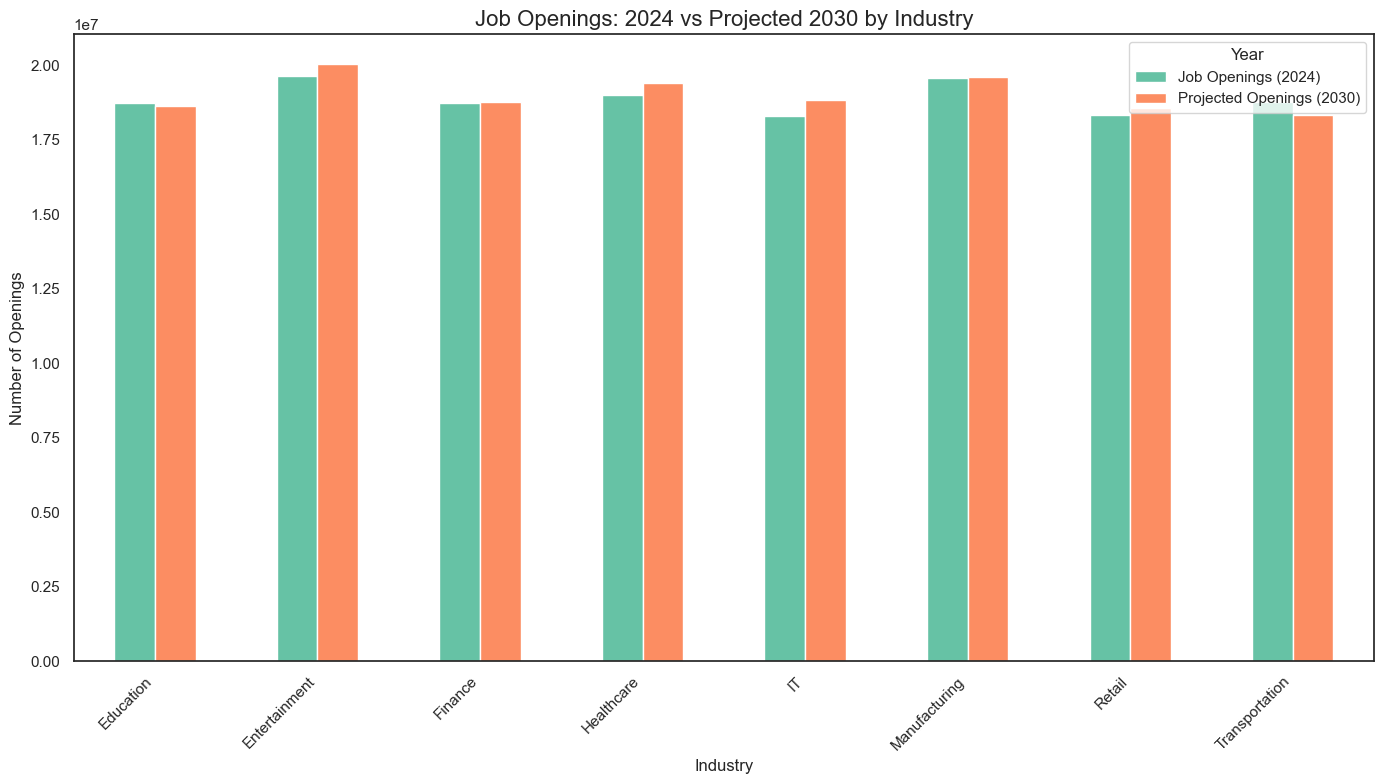

In [68]:
# comparing job openings 2024 to 2030 for each industry

# Aggregate openings by industry
industry_openings = AI_data.groupby("Industry")[["Job Openings (2024)", "Projected Openings (2030)"]].sum()

# Plot
plt.figure(figsize=(14, 8))
industry_openings.plot(kind="bar", figsize=(14, 8))

plt.title("Job Openings: 2024 vs Projected 2030 by Industry", fontsize=16)
plt.xlabel("Industry", fontsize=12)
plt.ylabel("Number of Openings", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Year")
plt.tight_layout()
plt.show()


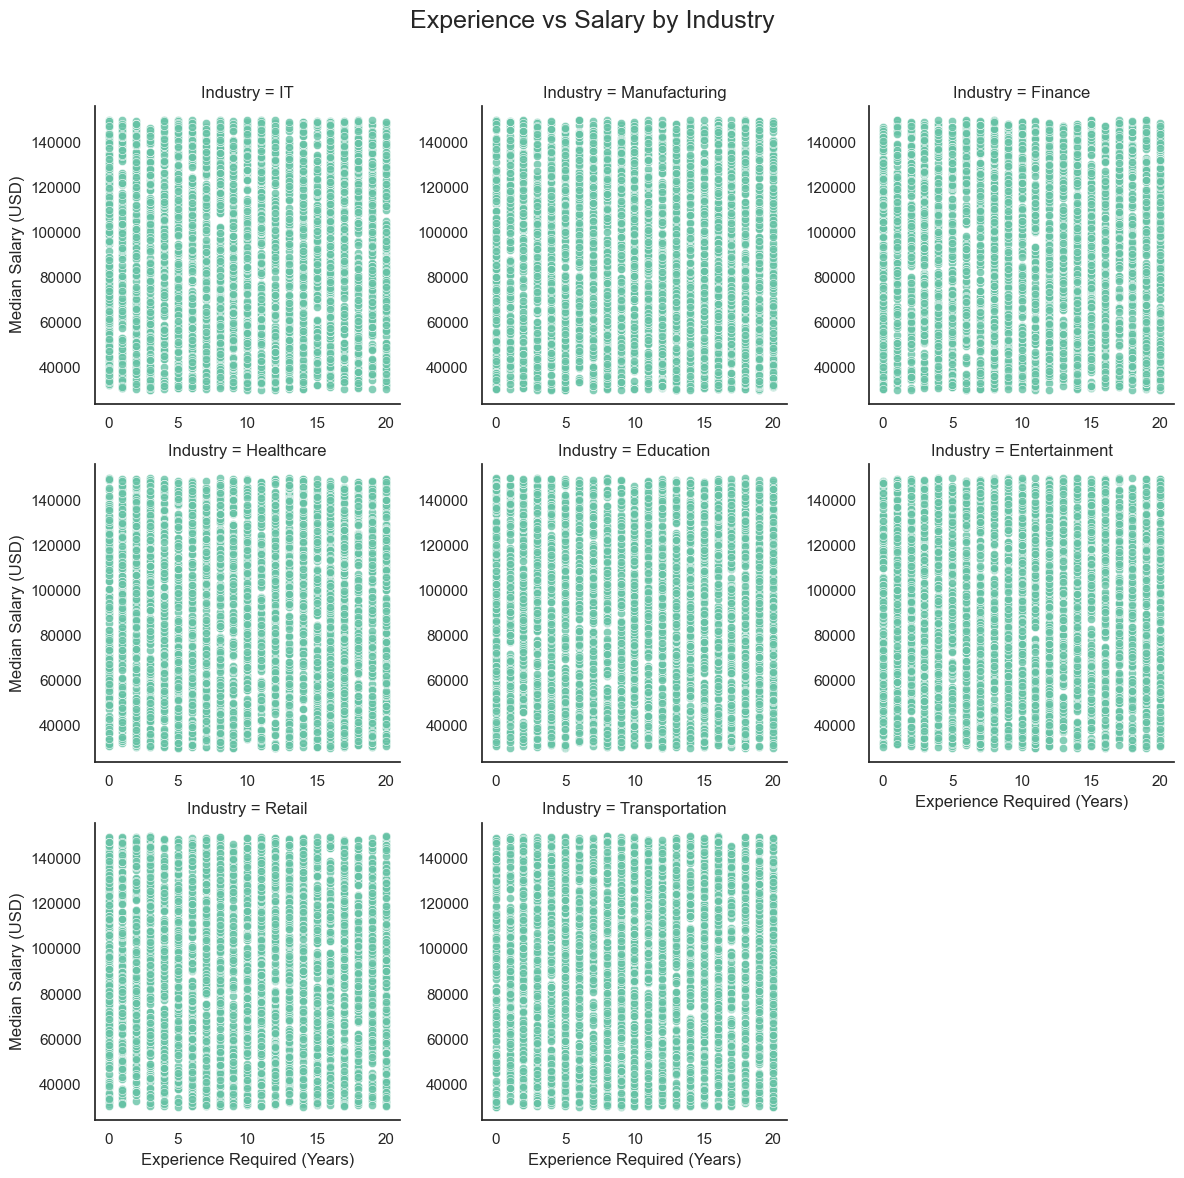

In [71]:
# looking at relationship between salary and experience needed per each industry

g = sns.FacetGrid(
    AI_data,
    col="Industry",
    col_wrap=3,
    height=4,
    sharex=False,
    sharey=False
)

g.map_dataframe(sns.scatterplot,
                x="Experience Required (Years)",
                y="Median Salary (USD)",
                alpha=0.8)

g.set_axis_labels("Experience Required (Years)", "Median Salary (USD)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Experience vs Salary by Industry", fontsize=18)
plt.show()



## Alternative Dispute Graphs Used in Infographic Here

I chose to create these specific graphs because they are very similar to graphs used on my infographic from the AI dataset, and creating a similar looking graph from real data will make them easier to compare side by side. 

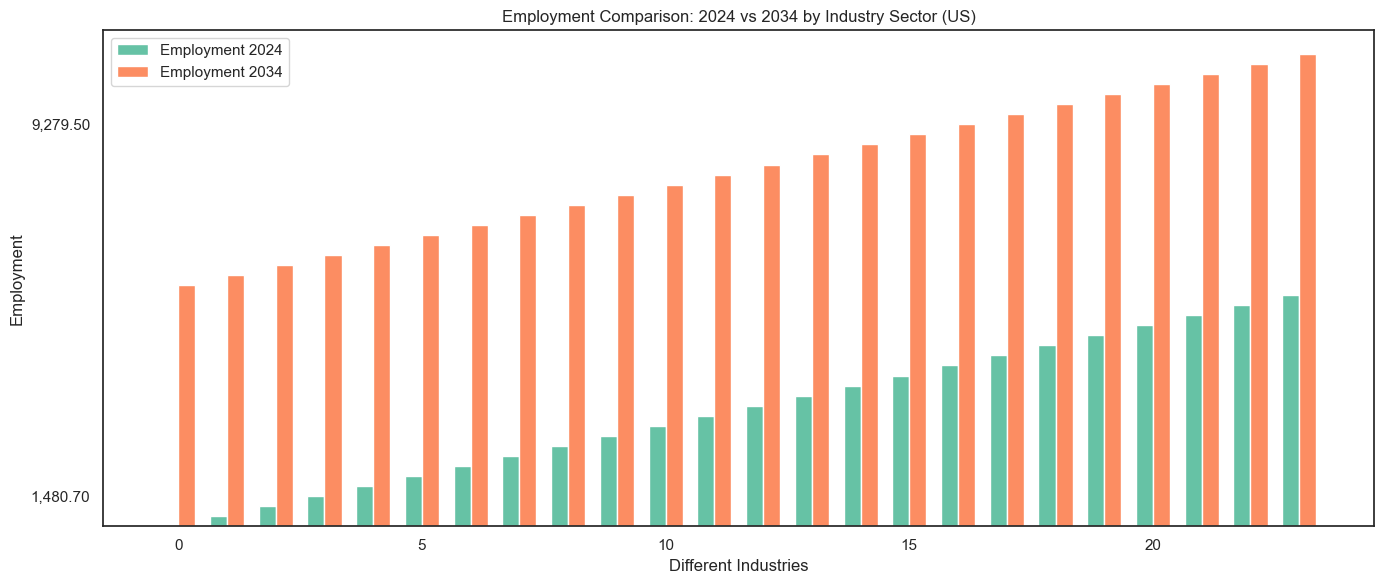

In [78]:
# DISPUTE GRAPHS


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

dfone = pd.read_csv("Job Growth - Sheet1.csv") # read in data

industries = dfone["Industry sector"] # Extract relevant columns for plotting
emp_2024 = dfone["Employment, 2024"]
emp_2034 = dfone["Employment, 2034"]

x = np.arange(len(industries)) # Create positions for bar groups along the x-axis
width = 0.35

plt.figure(figsize=(14,6))

plt.bar(x - width/2, emp_2024, width, label='Employment 2024') # Plot side-by-side bars for 2024 and 2034 employment levels
plt.bar(x + width/2, emp_2034, width, label='Employment 2034')

plt.xlabel("Different Industries") # Axis labels and chart title
plt.ylabel("Employment")
plt.title("Employment Comparison: 2024 vs 2034 by Industry Sector (US)")
plt.legend()


plt.yticks([emp_2024.min(), emp_2034.max()]) # Set y-ticks to show minimum 2024 value and maximum 2034 value

plt.tight_layout() # cleaner spacing
plt.show()



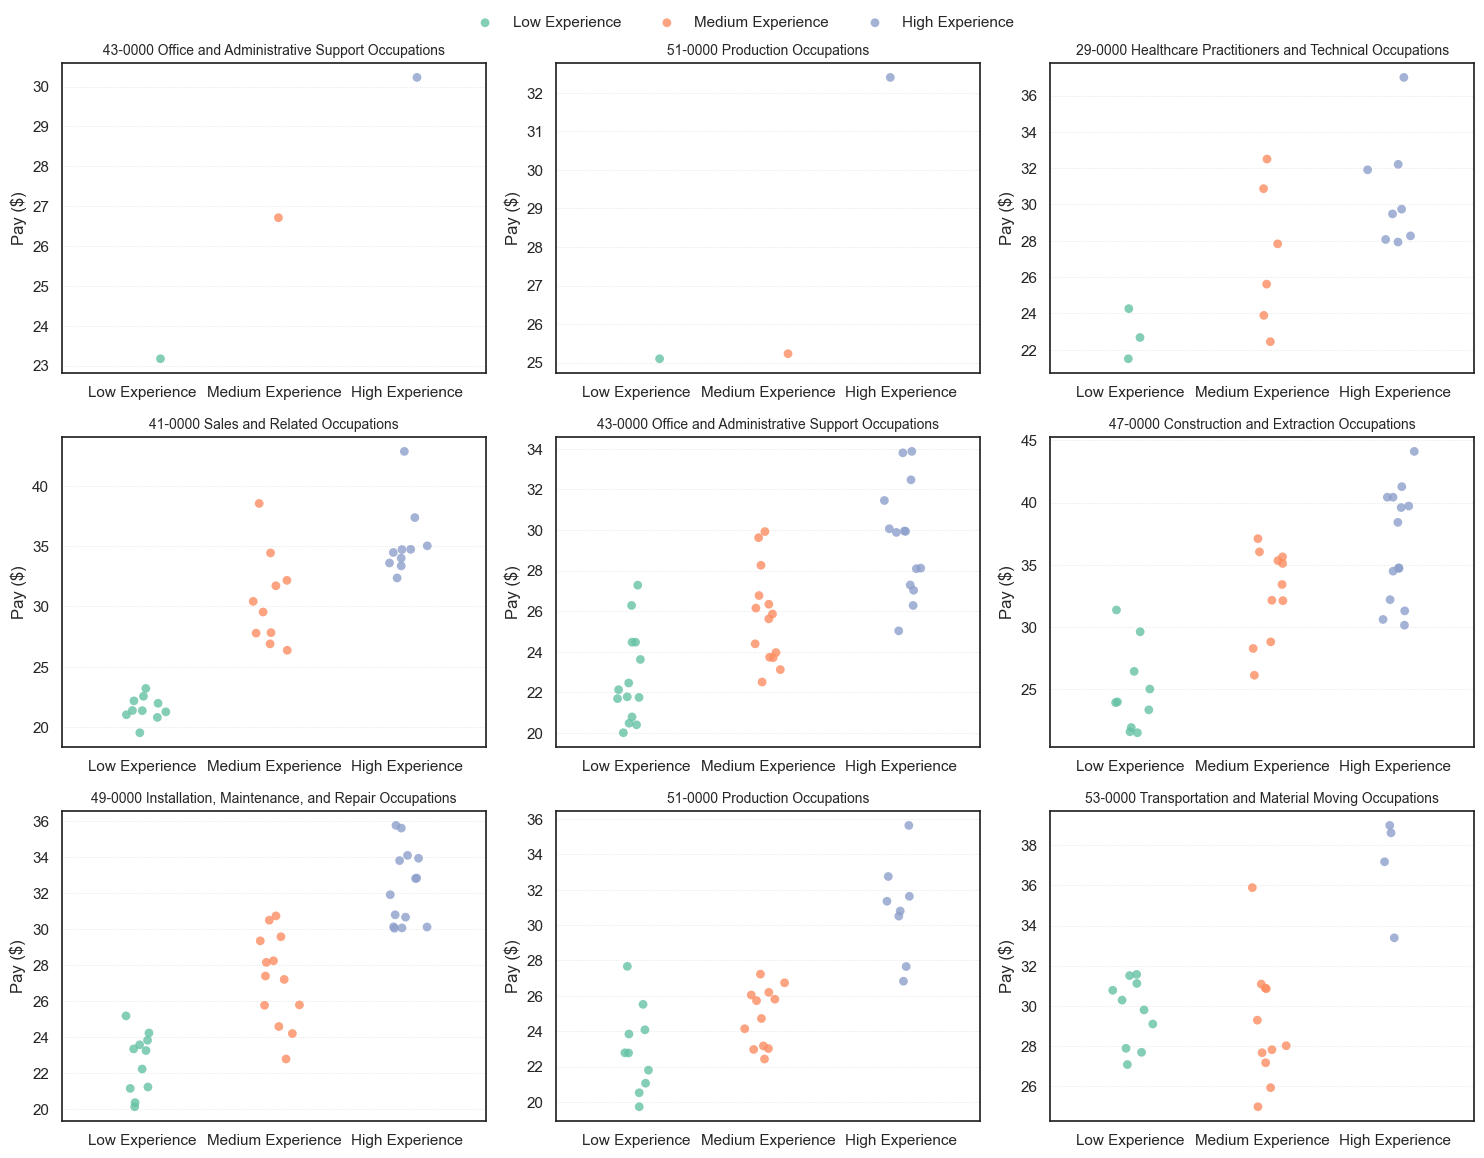

In [87]:

from matplotlib.ticker import FuncFormatter
import math

df = pd.read_csv("WagesByExperience - Sheet1.csv", header=1) # read in the data, fix empty line at the top
df.columns = df.columns.str.strip()

pay_cols = ["Low Experience", "Medium Experience", "High Experience"]
for col in pay_cols: # cleanings up the data of excess symbols
    df[col] = (
        df[col]
        .astype(str)
        .replace({"–": "", "-": "", "nan": ""})
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.strip()
        .replace("", np.nan)
    )
    df[col] = pd.to_numeric(df[col], errors="coerce")

df_long = df.melt( # Convert the data from wide format to long format for plotting
    id_vars=["Sector", "Info ID"],
    value_vars=pay_cols,
    var_name="Experience",
    value_name="Pay"
)
df_long = df_long.dropna(subset=["Pay"]) # Remove rows where pay is missing

sectors = sorted(df_long["Sector"].unique()) # Prepare layout for multiple subplots (one for each sector)
n = len(sectors)
cols = 3
rows = math.ceil(n / cols)
fig_w = min(18, cols * 5)
fig_h = rows * 4
fig, axes = plt.subplots(rows, cols, figsize=(fig_w, fig_h), squeeze=False)
# Map experience categories to x-axis positions
x_map = {"Low Experience": 0, "Medium Experience": 1, "High Experience": 2}
x_ticks = [0, 1, 2]
x_labels = ["Low Experience", "Medium Experience", "High Experience"]

np.random.seed(0) # For reproducible jitter
# Plot scatterplots for each sector
for ax_idx, sector in enumerate(sectors):
    r = ax_idx // cols
    c = ax_idx % cols
    ax = axes[r][c]

    sub = df_long[df_long["Sector"] == sector]

    for exp in x_labels:
        subsub = sub[sub["Experience"] == exp]
        if subsub.empty:
            continue
        
        x_pos = x_map[exp]
        jitter = np.random.normal(loc=0.0, scale=0.08, size=len(subsub))
        xs = np.full(len(subsub), x_pos) + jitter
        
        
        ax.scatter(xs, subsub["Pay"], alpha=0.8, s=40, label=exp, edgecolors="none")

    ax.set_title(sector, fontsize=10)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(x_labels)
    ax.set_xlim(-0.6, 2.6)
    ax.set_ylabel("Pay ($)")
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f"{int(x):,}"))
    ax.grid(axis="y", linestyle=":", linewidth=0.6, alpha=0.6)

total_plots = rows * cols
for extra_idx in range(len(sectors), total_plots):
    r = extra_idx // cols
    c = extra_idx % cols
    axes[r][c].set_visible(False)

# Create a single legend for all plots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="upper center", ncol=3, frameon=False, bbox_to_anchor=(0.5, 0.97))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

